# Project on observation of factors affecting loan defaulters and model creation to predict potential defaulters

In [313]:
import numpy as np;
import pandas as pd;
import openpyxl;
import matplotlib.pyplot as plt;
import seaborn as sns;
from scipy.stats import spearmanr;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV;
from sklearn.preprocessing import Normalizer;
from sklearn.metrics import confusion_matrix;

## Week 1: Importing, Understanding, and Inspecting Data

In [2]:
loan_df=pd.read_excel("data.xlsx");

### 1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [3]:
loan_df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [5]:
len(loan_df['UniqueID'])

233154

In [6]:
len((loan_df['UniqueID']).unique())

233154

#### "Employment.Type" column has few missing values.  There are no duplicate IDs

### 2. Variable names in the data may not be in accordance with the identifier naming in Python so, change the variable names accordingly

In [7]:
loan_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [8]:
loan_df.columns=[val.replace('.','_') for val in loan_df.columns]

In [9]:
loan_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

### 3. The presented data might also contain some missing values therefore, exploration will also lead to devising strategies to fill in the missing values while exploring the data

In [10]:
len(loan_df[loan_df.Employment_Type.isna()])

7661

In [11]:
loan_df.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

### 4. Provide the statistical description of the quantitative data variables

In [12]:
loan_df.disbursed_amount

0         50578
1         53278
2         52378
3         46349
4         43594
          ...  
233149    57759
233150    55009
233151    58513
233152    22824
233153    35299
Name: disbursed_amount, Length: 233154, dtype: int64

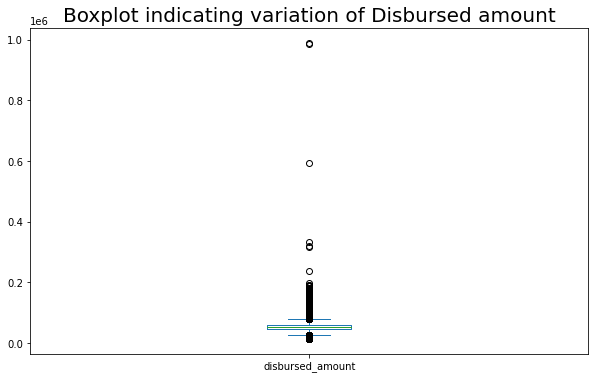

In [13]:
fig1,ax1=plt.subplots(1,1,figsize=(10,6));
loan_df.disbursed_amount.plot.box(ax=ax1);
ax1.set_title("Boxplot indicating variation of Disbursed amount",size=20);

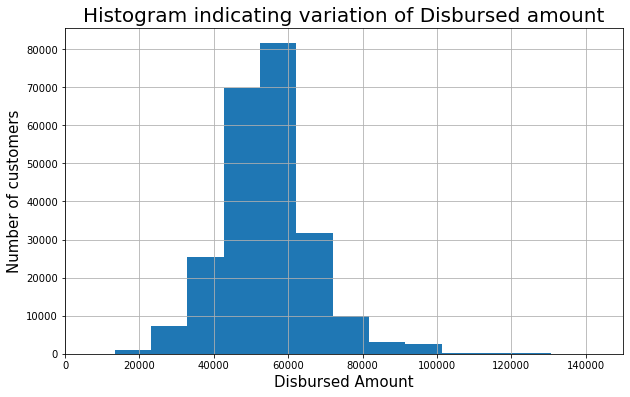

In [14]:
fig2,ax2=plt.subplots(1,1,figsize=(10,6));
loan_df.disbursed_amount.hist(ax=ax2,bins=100);
ax2.set_xlim([0,150000]);
ax2.set_xlabel("Disbursed Amount",size=15);
ax2.set_ylabel("Number of customers",size=15);
ax2.set_title("Histogram indicating variation of Disbursed amount",size=20);

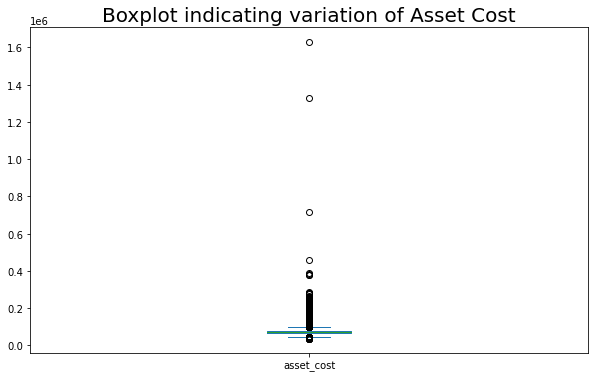

In [15]:
fig3,ax3=plt.subplots(1,1,figsize=(10,6));
loan_df.asset_cost.plot.box(ax=ax3); 
ax3.set_title("Boxplot indicating variation of Asset Cost",size=20);

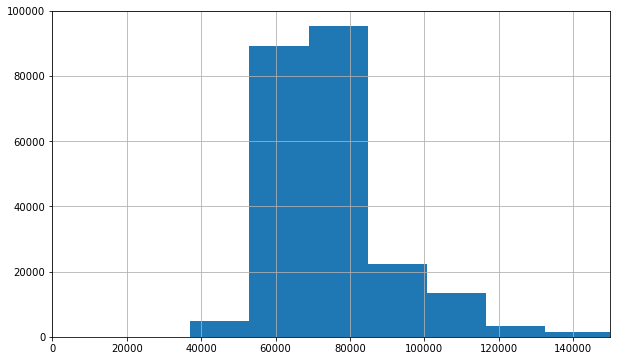

In [16]:
fig4,ax4=plt.subplots(1,1,figsize=(10,6));
loan_df.asset_cost.hist(ax=ax4,bins=100);
ax4.set_xlim([0,150000]);

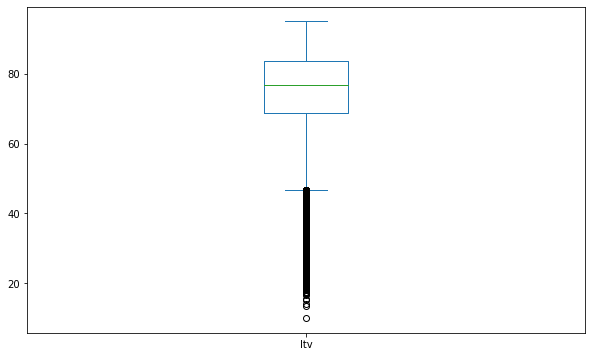

In [17]:
fig5,ax5=plt.subplots(1,1,figsize=(10,6));
loan_df.ltv.plot.box(ax=ax5);

In [18]:
loan_df.Date_of_Birth

0        1984-01-01
1        1985-08-24
2        1977-12-09
3        1988-06-01
4        1994-07-14
            ...    
233149   1981-11-10
233150   1992-10-15
233151   1981-12-19
233152   1989-07-31
233153   1968-08-01
Name: Date_of_Birth, Length: 233154, dtype: datetime64[ns]

In [19]:
import datetime as dt

In [20]:
dt.date.today()

datetime.date(2022, 11, 17)

In [21]:
loan_df['age']=[int(((dt.datetime.today()-i).days)/365.25) for i in  loan_df.Date_of_Birth];

In [22]:
loan_df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,38
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,37
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,44
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0,41
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0,30
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0,40
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0,33


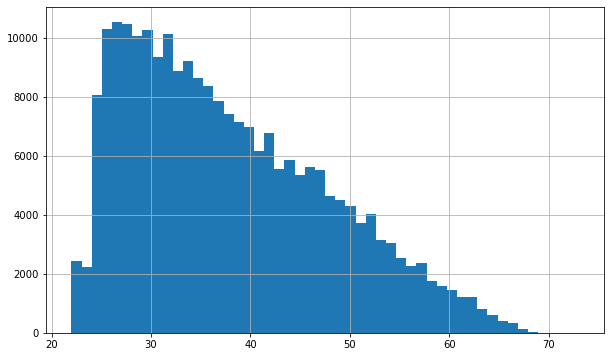

In [23]:
fig5,ax5=plt.subplots(1,1,figsize=(10,6));
loan_df['age'].hist(ax=ax5,bins=50);

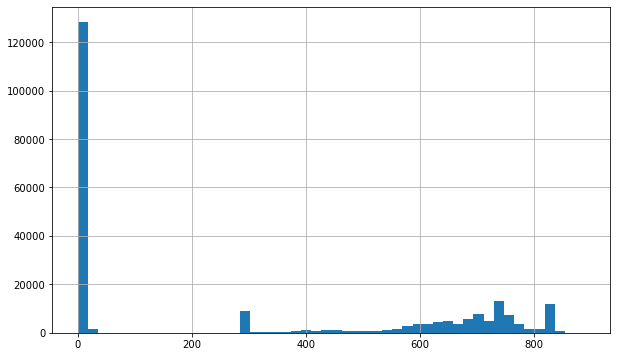

In [24]:
fig6,ax6=plt.subplots(1,1,figsize=(10,6));
loan_df.PERFORM_CNS_SCORE.hist(ax=ax6,bins=50);

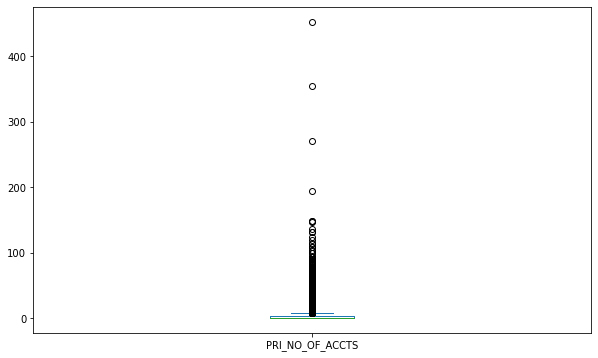

In [25]:
fig7,ax7=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_NO_OF_ACCTS.plot.box(ax=ax7);

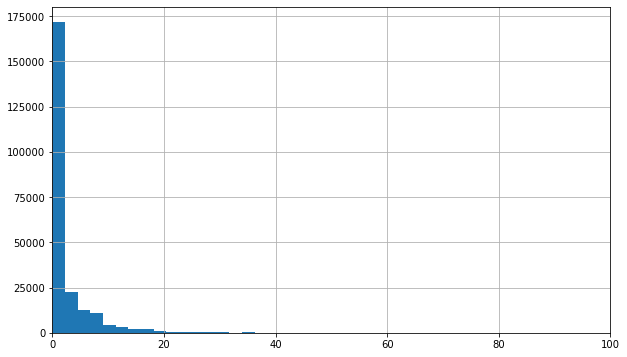

In [26]:
fig8,ax8=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_NO_OF_ACCTS.hist(ax=ax8,bins=200);
ax8.set_xlim([0,100]);

In [27]:
loan_df.PRI_NO_OF_ACCTS.value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
        ...  
85          1
131         1
124         1
453         1
194         1
Name: PRI_NO_OF_ACCTS, Length: 108, dtype: int64

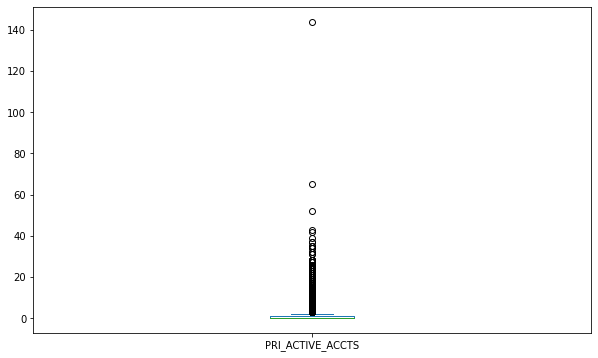

In [28]:
fig9,ax9=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_ACTIVE_ACCTS.plot.box(ax=ax9);

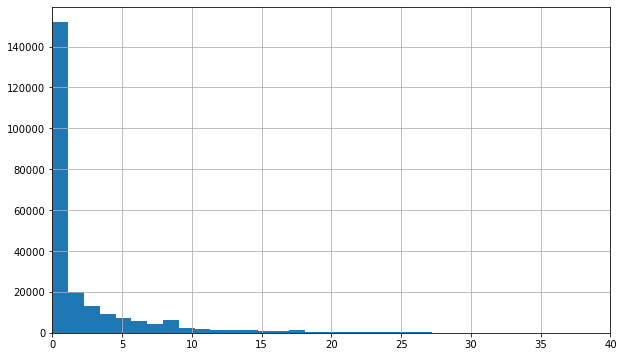

In [29]:
fig10,ax10=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_NO_OF_ACCTS.hist(ax=ax10,bins=400);
ax10.set_xlim([0,40]);

In [30]:
loan_df.PRI_NO_OF_ACCTS.value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
        ...  
85          1
131         1
124         1
453         1
194         1
Name: PRI_NO_OF_ACCTS, Length: 108, dtype: int64

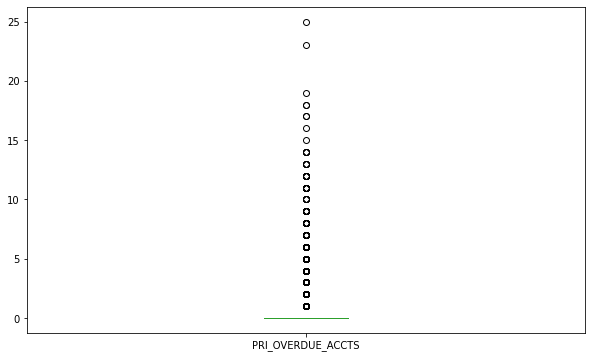

In [31]:
fig11,ax11=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_OVERDUE_ACCTS.plot.box(ax=ax11);

In [32]:
loan_df.PRI_OVERDUE_ACCTS.value_counts()

0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
14         5
13         5
18         2
17         2
23         1
19         1
15         1
16         1
25         1
Name: PRI_OVERDUE_ACCTS, dtype: int64

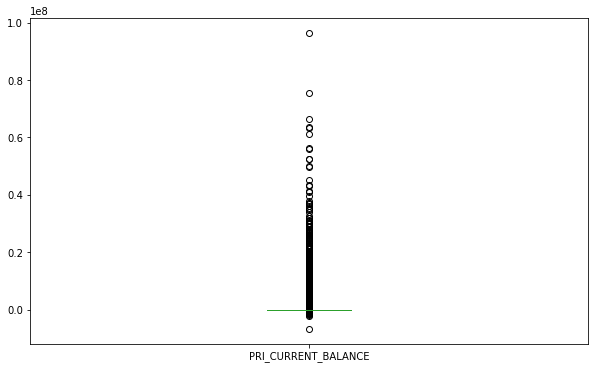

In [33]:
fig12,ax12=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_CURRENT_BALANCE.plot.box(ax=ax12);


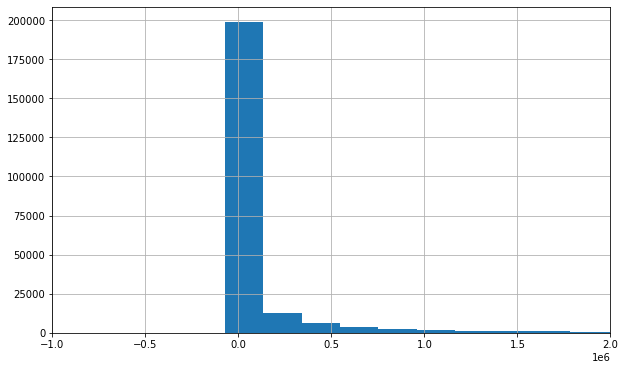

In [34]:
fig13,ax13=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_CURRENT_BALANCE.hist(ax=ax13,bins=500);
ax13.set_xlim([-1000000,2000000]);

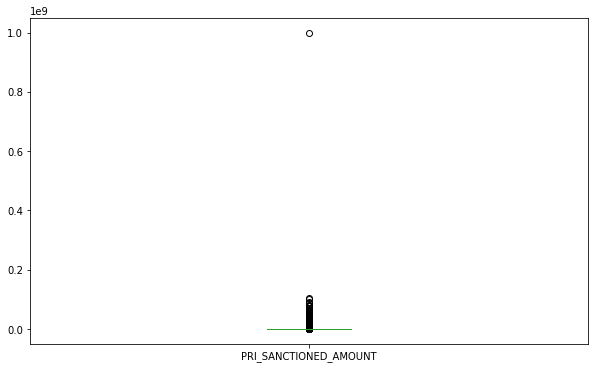

In [35]:
fig14,ax14=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_SANCTIONED_AMOUNT.plot.box(ax=ax14);

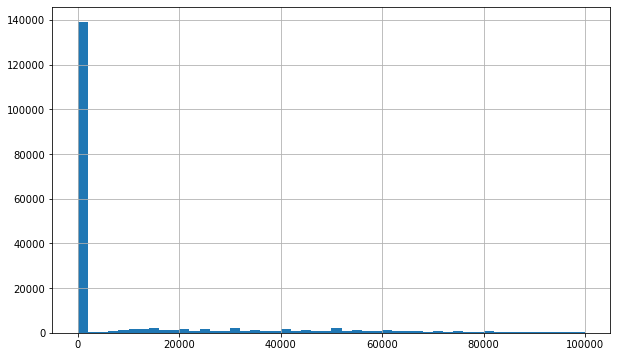

In [36]:
fig15,ax15=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_SANCTIONED_AMOUNT[loan_df.PRI_SANCTIONED_AMOUNT<100000].hist(ax=ax15,bins=50);


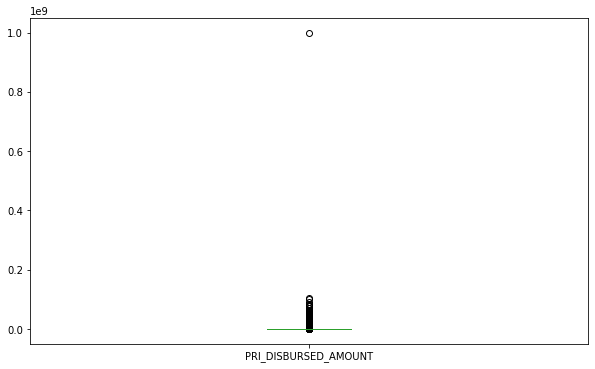

In [37]:
fig16,ax16=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_DISBURSED_AMOUNT.plot.box(ax=ax16);

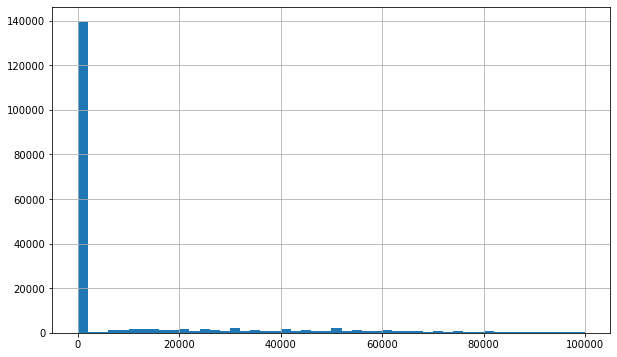

In [38]:
fig17,ax17=plt.subplots(1,1,figsize=(10,6));
loan_df.PRI_DISBURSED_AMOUNT[loan_df.PRI_DISBURSED_AMOUNT<100000].hist(ax=ax17,bins=50);

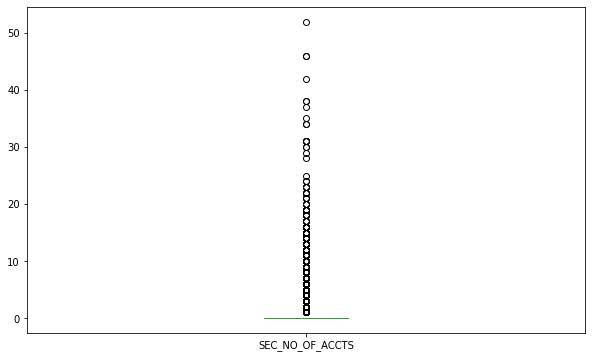

In [39]:
fig18,ax18=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_NO_OF_ACCTS.plot.box(ax=ax18);

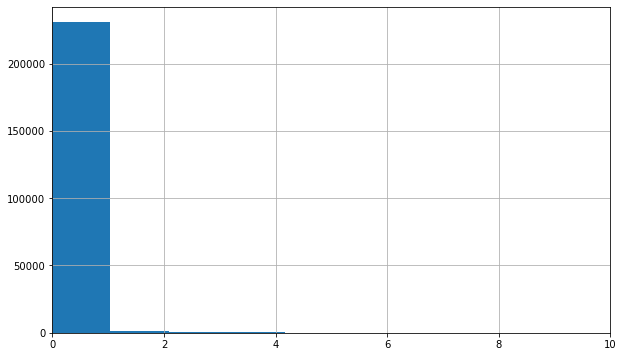

In [40]:
fig19,ax19=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_NO_OF_ACCTS.hist(ax=ax19,bins=50);
ax19.set_xlim([0,10]);

In [41]:
loan_df.SEC_NO_OF_ACCTS.value_counts()

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
14        11
16        11
15        10
18         6
19         6
17         5
23         4
31         4
22         4
20         4
21         3
46         2
24         2
34         2
30         2
38         2
35         1
25         1
28         1
37         1
42         1
52         1
29         1
Name: SEC_NO_OF_ACCTS, dtype: int64

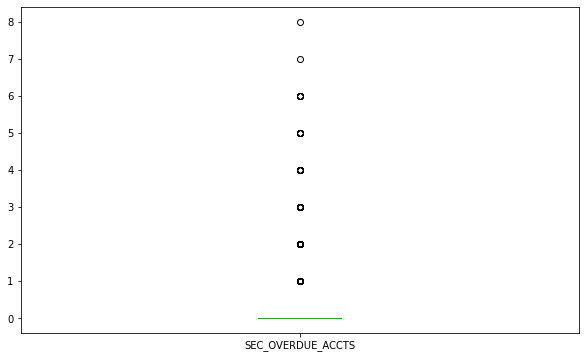

In [42]:
fig20,ax20=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_OVERDUE_ACCTS.plot.box(ax=ax20);

In [43]:
loan_df.SEC_OVERDUE_ACCTS.value_counts()

0    231817
1      1129
2       126
3        47
4        19
5         8
6         6
7         1
8         1
Name: SEC_OVERDUE_ACCTS, dtype: int64

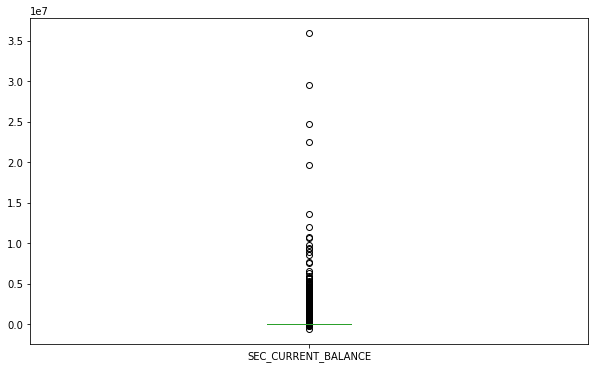

In [44]:
fig21,ax21=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_CURRENT_BALANCE.plot.box(ax=ax21);

In [45]:
loan_df.SEC_CURRENT_BALANCE.value_counts()

0          229790
800            10
100             8
400             8
589             6
            ...  
25920           1
4979            1
249287          1
1799            1
1119615         1
Name: SEC_CURRENT_BALANCE, Length: 3246, dtype: int64

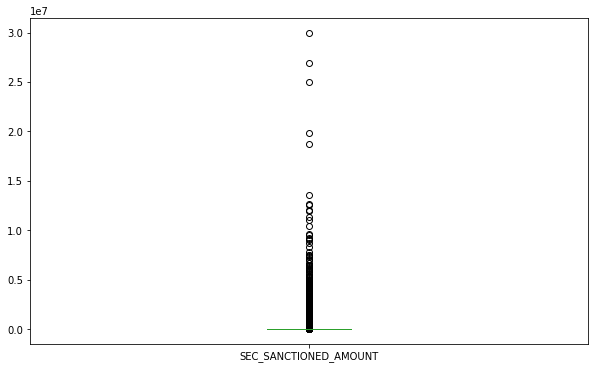

In [46]:
fig22,ax22=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_SANCTIONED_AMOUNT.plot.box(ax=ax22);

In [47]:
loan_df.SEC_SANCTIONED_AMOUNT.value_counts()

0         229418
50000         83
100000        61
30000         44
40000         39
           ...  
14300          1
43225          1
295000         1
752933         1
360499         1
Name: SEC_SANCTIONED_AMOUNT, Length: 2223, dtype: int64

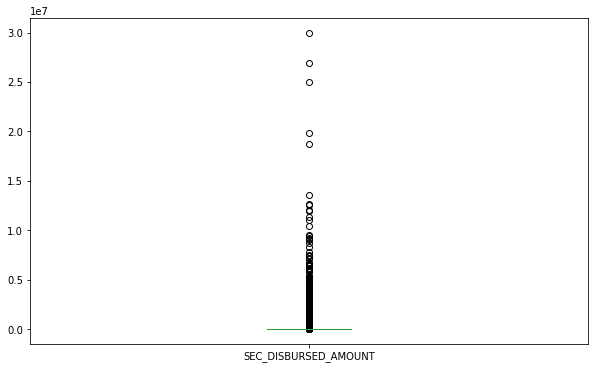

In [48]:
fig23,ax23=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_DISBURSED_AMOUNT.plot.box(ax=ax23);

In [49]:
loan_df.SEC_DISBURSED_AMOUNT.value_counts()

0         229450
50000         59
100000        47
200000        36
40000         31
           ...  
141467         1
252785         1
136000         1
39110          1
360499         1
Name: SEC_DISBURSED_AMOUNT, Length: 2553, dtype: int64

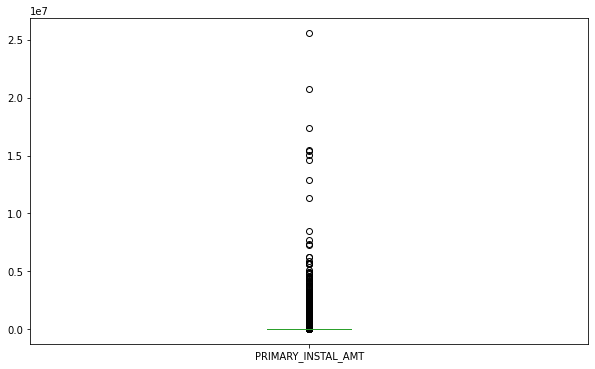

In [50]:
fig24,ax24=plt.subplots(1,1,figsize=(10,6));
loan_df.PRIMARY_INSTAL_AMT.plot.box(ax=ax24);

In [51]:
loan_df.PRIMARY_INSTAL_AMT.value_counts()

0         159517
1620         292
1500         156
1600         144
2000         141
           ...  
102786         1
33778          1
26603          1
14425          1
293886         1
Name: PRIMARY_INSTAL_AMT, Length: 28067, dtype: int64

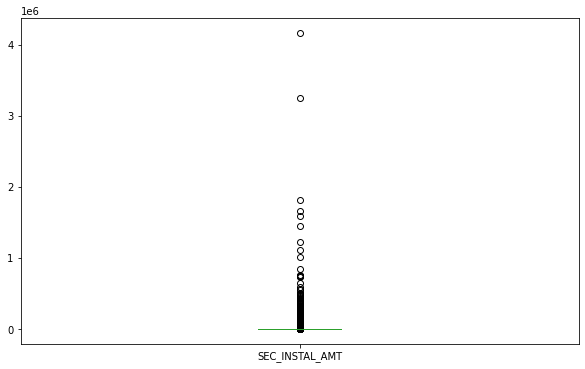

In [52]:
fig25,ax25=plt.subplots(1,1,figsize=(10,6));
loan_df.SEC_INSTAL_AMT.plot.box(ax=ax25);

In [53]:
loan_df.SEC_INSTAL_AMT.value_counts()

0        230937
2100          7
5000          6
1065          6
1100          6
          ...  
7595          1
6971          1
1529          1
14260         1
49956         1
Name: SEC_INSTAL_AMT, Length: 1918, dtype: int64

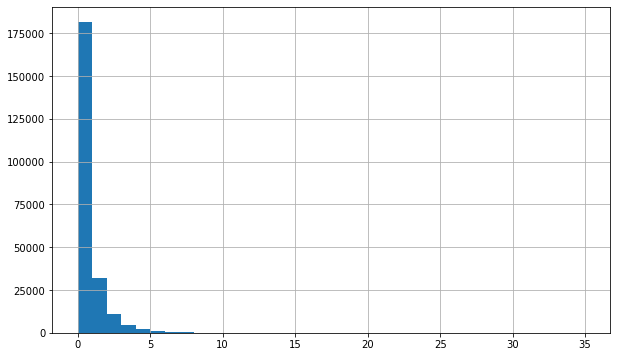

In [54]:
fig26,ax26=plt.subplots(1,1,figsize=(10,6));
loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS.hist(ax=ax26,bins=35);

In [55]:
loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS.value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
18         2
15         2
19         2
23         2
22         1
21         1
28         1
35         1
Name: NEW_ACCTS_IN_LAST_SIX_MONTHS, dtype: int64

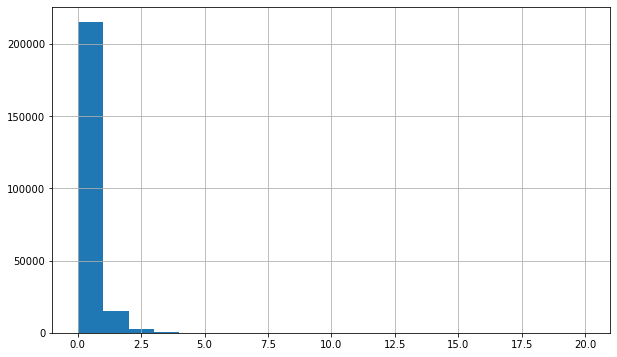

In [56]:
fig27,ax27=plt.subplots(1,1,figsize=(10,6));
loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS.hist(ax=ax27,bins=20);

In [57]:
loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS.value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
11         3
12         3
10         2
9          2
20         1
Name: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, dtype: int64

In [58]:
loan_df.AVERAGE_ACCT_AGE=[float(i.split()[0][:-3])+float(i.split()[1][:-3])/12 for i in loan_df.AVERAGE_ACCT_AGE];

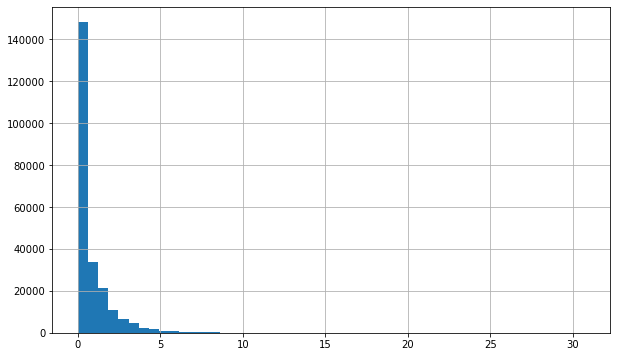

In [59]:
fig28,ax28=plt.subplots(1,1,figsize=(10,6));
loan_df.AVERAGE_ACCT_AGE.hist(ax=ax28,bins=50);

In [60]:
loan_df.CREDIT_HISTORY_LENGTH=[float(i.split()[0][:-3])+float(i.split()[1][:-3])/12 for i in loan_df.CREDIT_HISTORY_LENGTH];

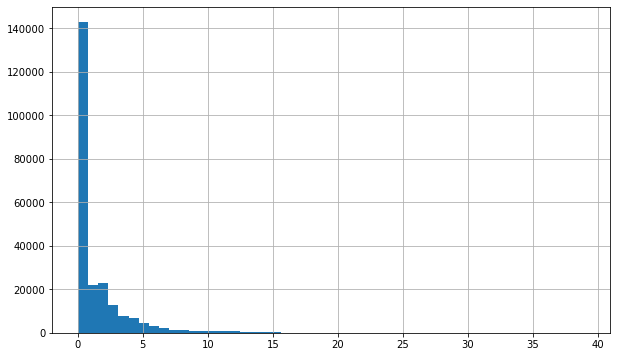

In [61]:
fig29,ax29=plt.subplots(1,1,figsize=(10,6));
loan_df.CREDIT_HISTORY_LENGTH.hist(ax=ax29,bins=50);

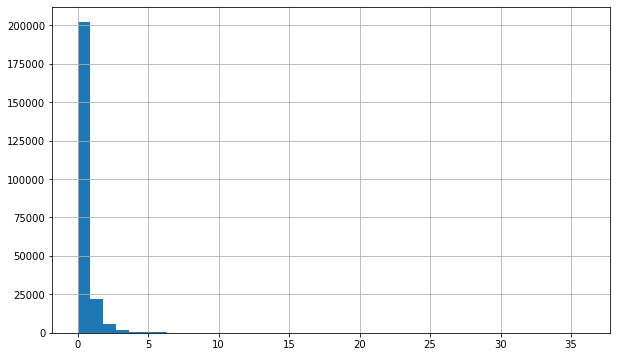

In [62]:
fig30,ax30=plt.subplots(1,1,figsize=(10,6));
loan_df.NO_OF_INQUIRIES.hist(ax=ax30,bins=40);

In [63]:
loan_df.NO_OF_INQUIRIES.value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
19         6
13         6
17         4
18         4
16         3
28         1
20         1
23         1
36         1
22         1
Name: NO_OF_INQUIRIES, dtype: int64

### 5. Explain how is the target variable distributed overall

In [64]:
loan_df.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

### 6. Study the distribution of the target variable across various categories like branch, city, state, branch, supplier, manufacturer, etc.

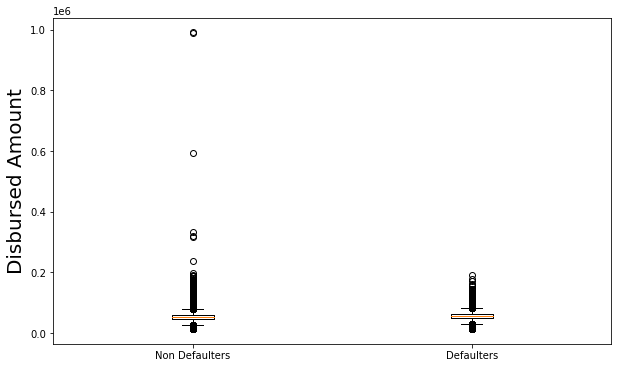

In [65]:
fig31,ax31=plt.subplots(1,1,figsize=(10,6));
ax31.boxplot([loan_df.disbursed_amount[loan_df.loan_default==0],loan_df.disbursed_amount[loan_df.loan_default==1]]);
ax31.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax31.set_ylabel('Disbursed Amount',size=20);

(0.0, 100000.0)

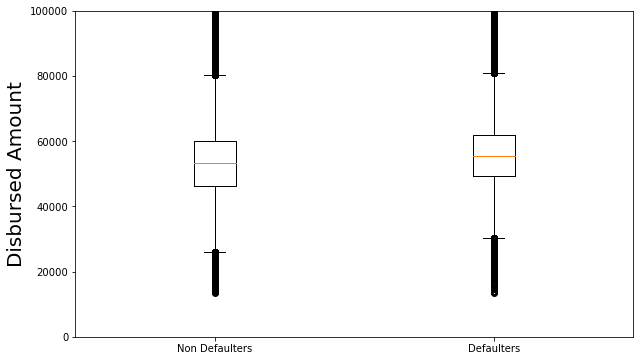

In [66]:
fig31,ax31=plt.subplots(1,1,figsize=(10,6));
ax31.boxplot([loan_df.disbursed_amount[loan_df.loan_default==0],loan_df.disbursed_amount[loan_df.loan_default==1]]);
ax31.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax31.set_ylabel('Disbursed Amount',size=20);
ax31.set_ylim([0,100000])

In [67]:
spearmanr(loan_df.disbursed_amount,loan_df.loan_default)

SpearmanrResult(correlation=0.09288435655814552, pvalue=0.0)

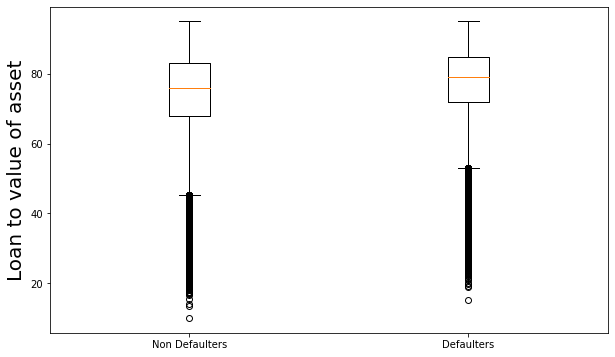

In [68]:
fig32,ax32=plt.subplots(1,1,figsize=(10,6));
ax32.boxplot([loan_df.ltv[loan_df.loan_default==0],loan_df.ltv[loan_df.loan_default==1]]); 
ax32.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax32.set_ylabel('Loan to value of asset',size=20);

In [69]:
spearmanr(loan_df.ltv,loan_df.loan_default)

SpearmanrResult(correlation=0.09908847004863419, pvalue=0.0)

In [70]:
branch_count=pd.merge(loan_df[loan_df.loan_default==0].branch_id.value_counts(),loan_df[loan_df.loan_default==1].branch_id.value_counts(),on=loan_df[loan_df.loan_default==0].branch_id.value_counts().index);    

In [71]:
branch_count.rename(columns={'branch_id_x':'num_non_defaulters','branch_id_y':'num_defaulters','key_0':'branch_number'},inplace=True)
branch_count.set_index(branch_count.branch_number, inplace=True)
branch_count.drop(columns=['branch_number'], inplace=True)
branch_count.sort_index(inplace=True)


In [72]:
branch_count['defaulter_ratio']=branch_count.num_defaulters/(branch_count.num_non_defaulters+branch_count.num_defaulters);

In [73]:
len(loan_df[loan_df.loan_default==1])/len(loan_df)

0.2170711203753742

In [74]:
branch_count.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True) 

In [75]:
branch_count

,num_non_defaulters,num_defaulters,defaulter_ratio
branch_number,,,
158,50,19,0.275362
258,297,98,0.248101
217,138,45,0.245902
35,500,158,0.240122
69,595,187,0.239130
...,...,...,...
73,1158,279,0.194154
254,1148,269,0.189838
17,989,227,0.186678


In [76]:
loan_df.manufacturer_id.value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

In [77]:
loan_df[loan_df.loan_default==0].manufacturer_id.value_counts()

86     87124
45     43687
51     21547
48     12156
49      7984
120     7526
67      1882
145      622
153        8
152        6
156        1
Name: manufacturer_id, dtype: int64

In [78]:
loan_df[loan_df.loan_default==1].manufacturer_id.value_counts()

86     22410
45     12939
51      5657
48      4554
49      2236
120     2132
67       523
145      156
153        4
Name: manufacturer_id, dtype: int64

In [79]:
loan_df.manufacturer_id.value_counts().index

Int64Index([86, 45, 51, 48, 49, 120, 67, 145, 153, 152, 156], dtype='int64')

In [80]:
manufacturer_cnt=pd.merge(loan_df[loan_df.loan_default==0].manufacturer_id.value_counts(),loan_df[loan_df.loan_default==1].manufacturer_id.value_counts(),how='left',left_index=True,right_index=True);  

In [81]:
manufacturer_cnt.fillna(0,inplace=True);
manufacturer_cnt.rename(columns={'manufacturer_id_x':'num_non_defaulters','manufacturer_id_y':'num_defaulters'},inplace=True)
manufacturer_cnt.sort_index(inplace=True)

In [82]:
manufacturer_cnt['defaulter_ratio']=manufacturer_cnt.num_defaulters/(manufacturer_cnt.num_non_defaulters+manufacturer_cnt.num_defaulters);
manufacturer_cnt.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True)

In [83]:
manufacturer_cnt

,num_non_defaulters,num_defaulters,defaulter_ratio
153,8,4.0,0.333333
48,12156,4554.0,0.272531
45,43687,12939.0,0.228499
120,7526,2132.0,0.220750
49,7984,2236.0,0.218787
67,1882,523.0,0.217464
51,21547,5657.0,0.207947
86,87124,22410.0,0.204594
145,622,156.0,0.200514
152,6,0.0,0.000000


In [84]:
supplier_cnt=pd.merge(loan_df[loan_df.loan_default==0].supplier_id.value_counts(),loan_df[loan_df.loan_default==1].supplier_id.value_counts(),how='outer',left_index=True,right_index=True);

In [85]:
supplier_cnt.fillna(0,inplace=True);
supplier_cnt.rename(columns={'supplier_id_x':'num_non_defaulters','supplier_id_y':'num_defaulters'},inplace=True)
supplier_cnt.sort_index(inplace=True)

In [86]:
supplier_cnt['defaulter_ratio']=supplier_cnt.num_defaulters/(supplier_cnt.num_non_defaulters+supplier_cnt.num_defaulters);
supplier_cnt.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True)

In [87]:
supplier_cnt.head(60)

,num_non_defaulters,num_defaulters,defaulter_ratio
15045,0.0,1.0,1.000000
24109,0.0,3.0,1.000000
23685,0.0,2.0,1.000000
23741,0.0,1.0,1.000000
18513,0.0,1.0,1.000000
23802,0.0,1.0,1.000000
23932,0.0,1.0,1.000000
18102,0.0,1.0,1.000000
18099,0.0,2.0,1.000000
22474,0.0,1.0,1.000000


In [88]:
supplier_cnt.tail(60)

,num_non_defaulters,num_defaulters,defaulter_ratio
22985,2.0,0.0,0.0
21314,2.0,0.0,0.0
23005,8.0,0.0,0.0
23406,1.0,0.0,0.0
21149,1.0,0.0,0.0
18123,13.0,0.0,0.0
24581,1.0,0.0,0.0
23404,18.0,0.0,0.0
23038,1.0,0.0,0.0
23037,2.0,0.0,0.0


### 7. What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)?  Use pie charts to express the different types of employment that define the defaulters and non-defaulters.

In [89]:
loan_df[loan_df.Employment_Type.isna()].Employee_code_ID.value_counts()

908     62
1660    43
194     42
1192    40
140     39
        ..
327      1
2686     1
2629     1
1082     1
199      1
Name: Employee_code_ID, Length: 1379, dtype: int64

In [90]:
loan_df.Employee_code_ID.value_counts()[908]

341

In [91]:
loan_df[loan_df.Employment_Type=='Salaried'].Employee_code_ID.value_counts()[908]

278

In [92]:
loan_df[loan_df.Employment_Type=='Self employed'].Employee_code_ID.value_counts()[908]

1

In [93]:
loan_df.Employee_code_ID.value_counts()[194]

191

In [94]:
loan_df[loan_df.Employment_Type=='Salaried'].Employee_code_ID.value_counts()[194]

147

In [95]:
loan_df[loan_df.Employment_Type=='Self employed'].Employee_code_ID.value_counts()[194]

2

In [96]:
loan_df.Employee_code_ID.value_counts()[1192]

145

In [97]:
loan_df[loan_df.Employment_Type=='Salaried'].Employee_code_ID.value_counts()[1192]

76

In [98]:
loan_df[loan_df.Employment_Type=='Self employed'].Employee_code_ID.value_counts()[1192]

29

In [99]:
loan_df.Employee_code_ID.value_counts()[140]

185

In [100]:
loan_df[loan_df.Employment_Type=='Salaried'].Employee_code_ID.value_counts()[140]

122

In [101]:
loan_df[loan_df.Employment_Type=='Self employed'].Employee_code_ID.value_counts()[140]

24

#### Mode value of employee code id is a good way to assign Emplyee Type for na values

In [102]:
emp_mapping=dict();
for code_id in loan_df[loan_df.Employment_Type.isna()].Employee_code_ID.unique():
    emp_mapping[code_id]=str(loan_df[loan_df.Employee_code_ID==code_id]['Employment_Type'].mode()).split('\n')[0].split('0')[-1].strip();

In [103]:
loan_df.Employment_Type = loan_df.Employment_Type.fillna(loan_df.Employee_code_ID.map(emp_mapping))

In [104]:
loan_df.Employment_Type.value_counts()

Self employed                                       131849
Salaried                                            101304
Series([], Name: Employment_Type, dtype: object)         1
Name: Employment_Type, dtype: int64

In [105]:
loan_df.Employment_Type.mode()[0]

'Self employed'

In [106]:
loan_df.Employment_Type.replace(loan_df.loc[loan_df[(loan_df.Employment_Type!='Self employed') & (loan_df.Employment_Type!='Salaried')].index]['Employment_Type'].iloc[0],loan_df.Employment_Type.mode()[0],inplace=True)

In [107]:
loan_df.Employment_Type.value_counts()

Self employed    131850
Salaried         101304
Name: Employment_Type, dtype: int64

In [108]:
loan_df[loan_df.loan_default==0].Employment_Type.value_counts()

Self employed    101887
Salaried          80656
Name: Employment_Type, dtype: int64

In [109]:
loan_df[loan_df.loan_default==1].Employment_Type.value_counts()

Self employed    29963
Salaried         20648
Name: Employment_Type, dtype: int64

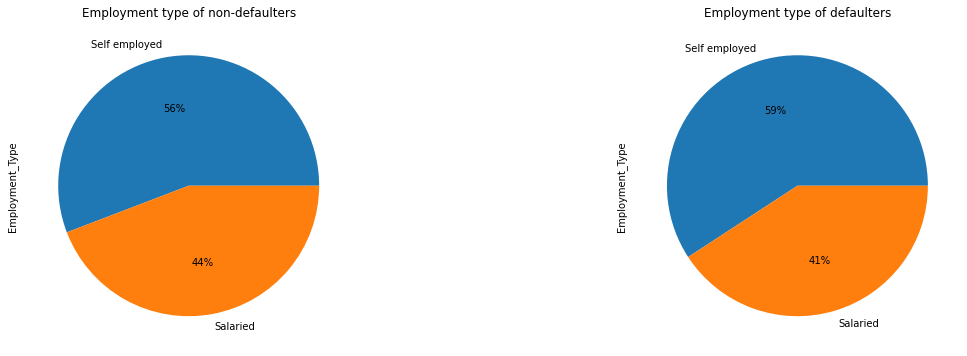

In [110]:
fig33,ax33=plt.subplots(1,2,figsize=(20,6));
loan_df[loan_df.loan_default==0].Employment_Type.value_counts().plot(kind='pie',autopct='%1.0f%%',ax=ax33[0]);
loan_df[loan_df.loan_default==1].Employment_Type.value_counts().plot(kind='pie',autopct='%1.0f%%',ax=ax33[1]);
ax33[0].set_title('Employment type of non-defaulters');
ax33[1].set_title('Employment type of defaulters');

### 8. Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?

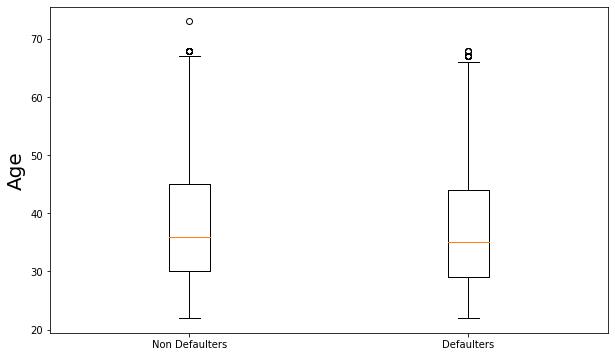

In [111]:
fig34,ax34=plt.subplots(1,1,figsize=(10,6));
ax34.boxplot([loan_df.age[loan_df.loan_default==0],loan_df.age[loan_df.loan_default==1]]); 
ax34.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax34.set_ylabel('Age',size=20);

### 9. What type of ID was presented by most of the customers for proof?

In [112]:
print("Percentage of customers who gave their mobile number is = " ,len(loan_df[loan_df.MobileNo_Avl_Flag==1])/len(loan_df)*100,"%")

Percentage of customers who gave their mobile number is =  100.0 %


In [113]:
print("Percentage of customers who gave their Aadhar card is = " ,len(loan_df[loan_df.Aadhar_flag==1])/len(loan_df)*100,"%")

Percentage of customers who gave their Aadhar card is =  84.03201317584086 %


In [114]:
print("Percentage of customers who gave their PAN card is = " ,len(loan_df[loan_df.PAN_flag==1])/len(loan_df)*100,'%')

Percentage of customers who gave their PAN card is =  7.557665748818378 %


In [115]:
print("Percentage of customers who gave their Voter ID card is = " ,len(loan_df[loan_df.VoterID_flag==1])/len(loan_df)*100,'%')

Percentage of customers who gave their Voter ID card is =  14.494282748741174 %


In [116]:
print("Percentage of customers who gave their Driving license card is = " ,len(loan_df[loan_df.Driving_flag==1])/len(loan_df)*100,'%')

Percentage of customers who gave their Driving license card is =  2.3242148965919522 %


In [117]:
print("Percentage of customers who gave their Passport card is = " ,len(loan_df[loan_df.Passport_flag==1])/len(loan_df)*100,'%')

Percentage of customers who gave their Passport card is =  0.21273493056091683 %


#### While all the customers presented their mobile number, most of them presented their Aadhar card for proof (84.03%)

## Observations based on Week 1 analysis:

1. There are a total of 233154 customer observations. The data has a total of 40 features and 1 target value indicating if there is loan default or not.
2. 'Employee_Type' parameter has 7661 null values. Remaining employess are classfied as "Self-Employed" and "Salaried". A good strategy to fill missing 'Emplyee_Type' values is to check the 'Employee_code_ID' and fill missing values accordingly as the mode of 'Employee_Type' for corresponding 'Employee_code_ID'. For example, 62 people with missing Employee_Type have Employee_Code_ID as 908. Among remaining customers, 278 salaried individuals have code ID 908 and only 1 self-employed customer has code ID 908. This suggests that majority of Salaries employees have employee Code id 908. Therefore, it would be safe to mention 'Salaried' as the 'Employee_Type' for missing values with 'Employee_code_ID' of 908.
3. Most customers have Disbursed amount and asset cost of 100,000 or less while these observations for others is much greater.
4. Most borrowers are young while as the age increases the number of borrowers decreases.
5. Most customers have very few primary or secondary accounts.
6. Most customers have average account age and credit history length of less than 5 years.
7. While 182543 are not defaulters, remaining 50611 are defaulters and need to be identified using appropriate model.
8. Customers who take survice from certain vehicle manufacturers and suppliers have higher tendency to default compared to other manfucturers and suppliers
9. Customers with higher loan to value of asset ratio have higher tendency to default.
10. Customers with higher disbursed amount have higher tendency to default.
11. Though age distribution of defaulters and non-defaulters is similar, the boxplots suggest that the age distrbution of defaulters tends to be marginally lower compared to no-defaulters.
12. While all the customers presented their mobile number, most of them presented their Aadhar card for proof (84.03%) and some others (14.49%) presented their Voter ID. However, very few customers present their Driving License, PAN card or passport.


## Week 2: Performing EDA and Modeling

### 1. Study the credit bureau score distribution. Compare the distribution for defaulters vs. non-defaulters. Explore in detail.

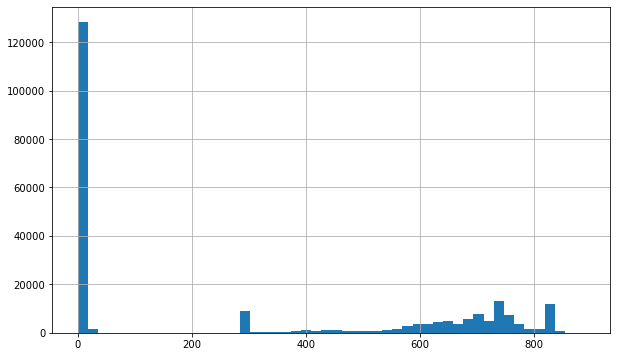

In [118]:
fig35,ax35=plt.subplots(1,1,figsize=(10,6));
loan_df.PERFORM_CNS_SCORE.hist(ax=ax35,bins=50);

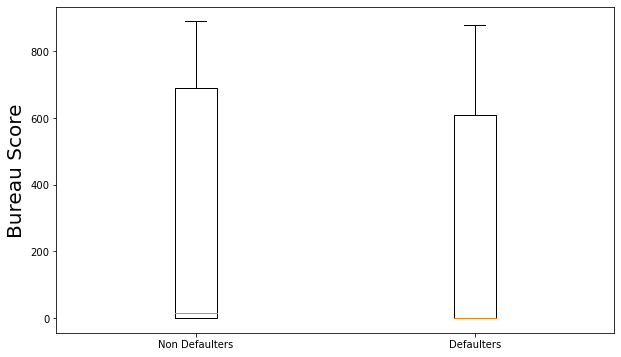

In [119]:
fig36,ax36=plt.subplots(1,1,figsize=(10,6));
ax36.boxplot([loan_df.PERFORM_CNS_SCORE[loan_df.loan_default==0],loan_df.PERFORM_CNS_SCORE[loan_df.loan_default==1]]); 
ax36.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax36.set_ylabel('Bureau Score',size=20);

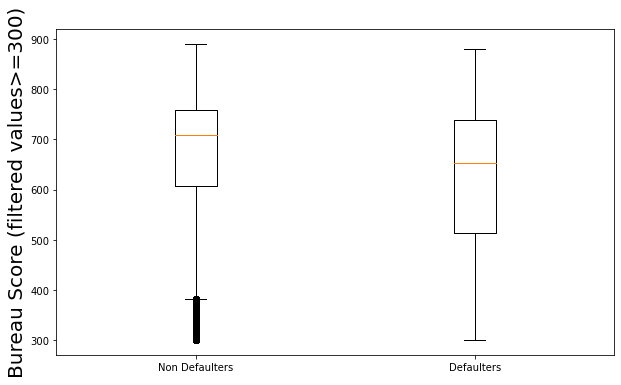

In [120]:
fig36,ax36=plt.subplots(1,1,figsize=(10,6));
ax36.boxplot([loan_df.PERFORM_CNS_SCORE[(loan_df.loan_default==0)&(loan_df.PERFORM_CNS_SCORE>=300)],loan_df.PERFORM_CNS_SCORE[(loan_df.loan_default==1)&(loan_df.PERFORM_CNS_SCORE>=300)]]); 
ax36.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax36.set_ylabel('Bureau Score (filtered values>=300)',size=20);

In [121]:
spearmanr(loan_df.PERFORM_CNS_SCORE[(loan_df.PERFORM_CNS_SCORE>=300)],loan_df.loan_default[(loan_df.PERFORM_CNS_SCORE>=300)])

SpearmanrResult(correlation=-0.12443220768045092, pvalue=0.0)

In [122]:
loan_df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [123]:
non_default_bureau_rating=loan_df.PERFORM_CNS_SCORE_DESCRIPTION[(loan_df.loan_default==0)].value_counts()

In [124]:
default_bureau_rating=loan_df.PERFORM_CNS_SCORE_DESCRIPTION[(loan_df.loan_default==1)].value_counts()

In [125]:
bureau_rating_dist=pd.merge(non_default_bureau_rating,default_bureau_rating ,how='left',left_index=True,right_index=True);  

In [126]:
bureau_rating_dist

,PERFORM_CNS_SCORE_DESCRIPTION_x,PERFORM_CNS_SCORE_DESCRIPTION_y
No Bureau History Available,89898,27052.0
C-Very Low Risk,13275,2770.0
A-Very Low Risk,11783,2341.0
D-Very Low Risk,9659,1699.0
B-Very Low Risk,7993,1208.0
F-Low Risk,6905,1580.0
M-Very High Risk,6103,2673.0
K-High Risk,5975,2302.0
H-Medium Risk,5197,1658.0
E-Low Risk,4821,1000.0


In [127]:
bureau_rating_dist.fillna(0,inplace=True);
bureau_rating_dist.rename(columns={'PERFORM_CNS_SCORE_DESCRIPTION_x':'num_non_defaulters','PERFORM_CNS_SCORE_DESCRIPTION_y':'num_defaulters'},inplace=True)
bureau_rating_dist.sort_index(inplace=True)

In [128]:
bureau_rating_dist['defaulter_ratio']=bureau_rating_dist.num_defaulters/(bureau_rating_dist.num_non_defaulters+bureau_rating_dist.num_defaulters);
bureau_rating_dist.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True)

In [129]:
bureau_rating_dist

,num_non_defaulters,num_defaulters,defaulter_ratio
M-Very High Risk,6103,2673.0,0.304581
L-Very High Risk,816,318.0,0.280423
K-High Risk,5975,2302.0,0.278120
I-Medium Risk,4042,1515.0,0.272629
Not Scored: Sufficient History Not Available,2802,963.0,0.255777
J-High Risk,2802,946.0,0.252401
H-Medium Risk,5197,1658.0,0.241867
No Bureau History Available,89898,27052.0,0.231313
Not Scored: Only a Guarantor,768,208.0,0.213115
Not Scored: Not Enough Info available on the customer,2902,770.0,0.209695


#### Boxplots show that non-defaulter have higher average bureau score compared to defaulters. Further, those with bureau rating description indicating high-risk profile of customer showcase more defaulters while those indicating low risk profile showcase fewer defaulters.

### 2. Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

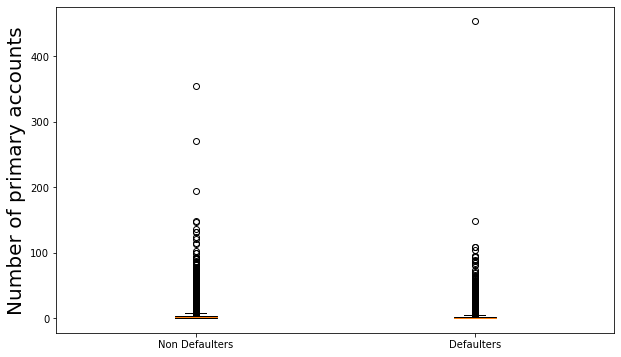

In [130]:
fig37,ax37=plt.subplots(1,1,figsize=(10,6));
ax37.boxplot([loan_df.PRI_NO_OF_ACCTS[loan_df.loan_default==0],loan_df.PRI_NO_OF_ACCTS[loan_df.loan_default==1]]);
ax37.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax37.set_ylabel('Number of primary accounts',size=20);

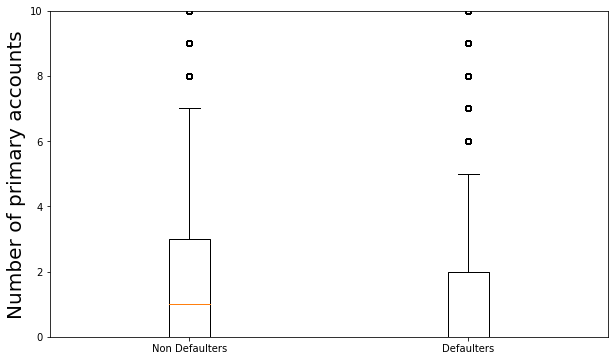

In [131]:
fig38,ax38=plt.subplots(1,1,figsize=(10,6));
ax38.boxplot([loan_df.PRI_NO_OF_ACCTS[loan_df.loan_default==0],loan_df.PRI_NO_OF_ACCTS[loan_df.loan_default==1]]);
ax38.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax38.set_ylabel('Number of primary accounts',size=20);
ax38.set_ylim([0,10]);

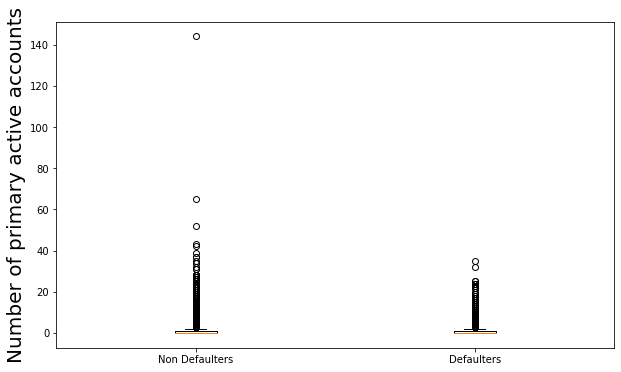

In [132]:
fig39,ax39=plt.subplots(1,1,figsize=(10,6));
ax39.boxplot([loan_df.PRI_ACTIVE_ACCTS[loan_df.loan_default==0],loan_df.PRI_ACTIVE_ACCTS[loan_df.loan_default==1]]);
ax39.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax39.set_ylabel('Number of primary active accounts',size=20);

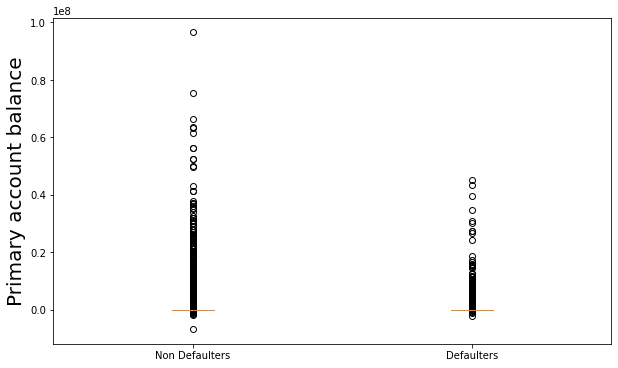

In [133]:
fig40,ax40=plt.subplots(1,1,figsize=(10,6));
ax40.boxplot([loan_df.PRI_CURRENT_BALANCE[loan_df.loan_default==0],loan_df.PRI_CURRENT_BALANCE[loan_df.loan_default==1]]);
ax40.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax40.set_ylabel('Primary account balance',size=20);

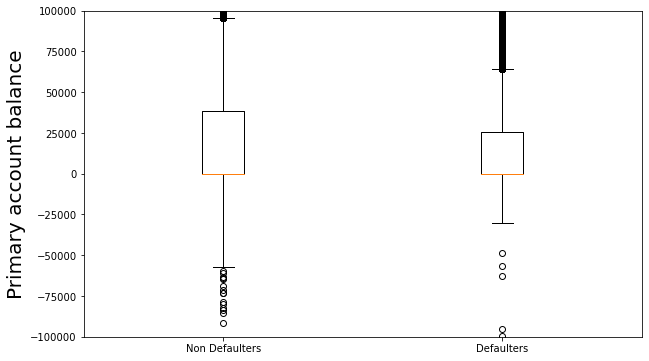

In [134]:
fig41,ax41=plt.subplots(1,1,figsize=(10,6));
ax41.boxplot([loan_df.PRI_CURRENT_BALANCE[loan_df.loan_default==0],loan_df.PRI_CURRENT_BALANCE[loan_df.loan_default==1]]);
ax41.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax41.set_ylabel('Primary account balance',size=20);
ax41.set_ylim([-100000,100000]);

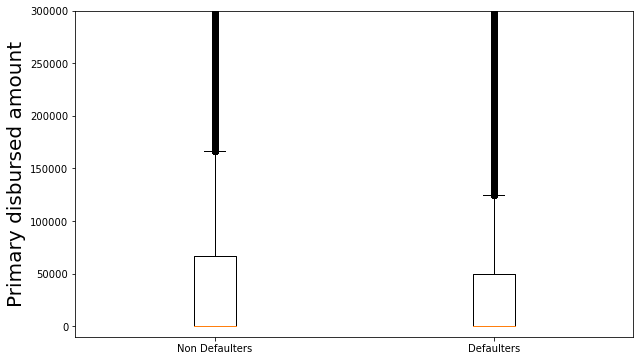

In [135]:
fig42,ax42=plt.subplots(1,1,figsize=(10,6));
ax42.boxplot([loan_df.PRI_DISBURSED_AMOUNT[loan_df.loan_default==0],loan_df.PRI_DISBURSED_AMOUNT[loan_df.loan_default==1]]);
ax42.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax42.set_ylabel('Primary disbursed amount',size=20);
ax42.set_ylim([-10000,300000]);

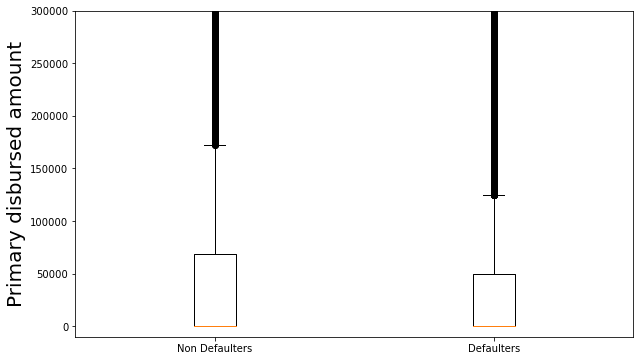

In [136]:
fig43,ax43=plt.subplots(1,1,figsize=(10,6));
ax43.boxplot([loan_df.PRI_SANCTIONED_AMOUNT[loan_df.loan_default==0],loan_df.PRI_SANCTIONED_AMOUNT[loan_df.loan_default==1]]);
ax43.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax43.set_ylabel('Primary disbursed amount',size=20);
ax43.set_ylim([-10000,300000]);

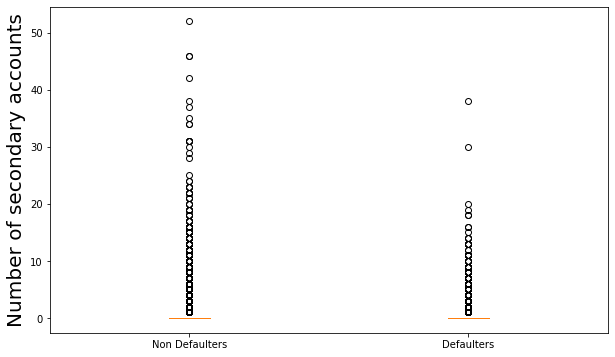

In [137]:
fig44,ax44=plt.subplots(1,1,figsize=(10,6));
ax44.boxplot([loan_df.SEC_NO_OF_ACCTS[loan_df.loan_default==0],loan_df.SEC_NO_OF_ACCTS[loan_df.loan_default==1]]);
ax44.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax44.set_ylabel('Number of secondary accounts',size=20);

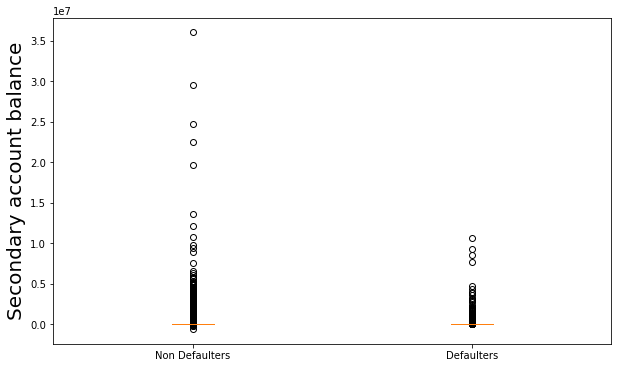

In [138]:
fig45,ax45=plt.subplots(1,1,figsize=(10,6));
ax45.boxplot([loan_df.SEC_CURRENT_BALANCE[loan_df.loan_default==0],loan_df.SEC_CURRENT_BALANCE[loan_df.loan_default==1]]);
ax45.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax45.set_ylabel('Secondary account balance',size=20);

#### If we ignore few extreme outliers, non-defaulters tend to have more number of primary accounts with higher balance and are sanctioned and disbursed with greater amount compared to defaulters. 
#### Most customers (both defaulter and non-defaulter) do not have any secondary account. In case of few outliers, non-defaulters tend to have more number of secondary accounts with greater account balance

### 3. Is there a difference between the sanctioned and disbursed amount of primary and secondary loans? Study the difference by providing appropriate statistics and graphs.

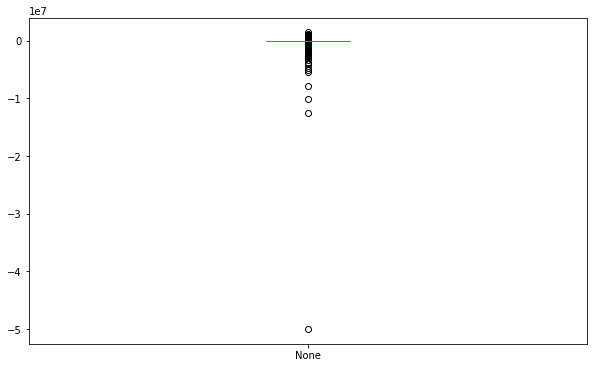

In [139]:
fig46,ax46=plt.subplots(1,1,figsize=(10,6));
(loan_df.PRI_SANCTIONED_AMOUNT-loan_df.PRI_DISBURSED_AMOUNT).plot.box(ax=ax46);

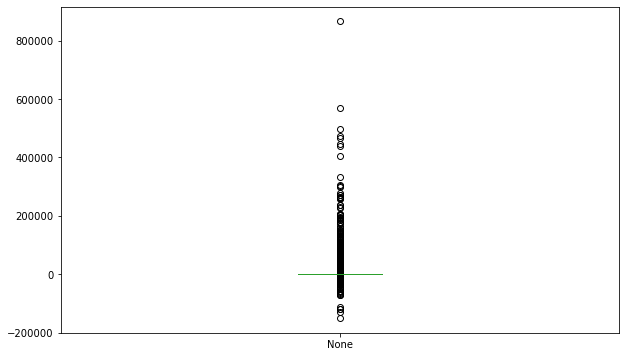

In [140]:
fig47,ax47=plt.subplots(1,1,figsize=(10,6));
(loan_df.SEC_SANCTIONED_AMOUNT-loan_df.SEC_DISBURSED_AMOUNT).plot.box(ax=ax47);

#### Though there is no difference between sanctioned and disbused amount for primary and secondary accounts of most customers, significant difference is observed for few customers.

### 4. Do customer who make higher number of enquiries end up being higher risk candidates? 

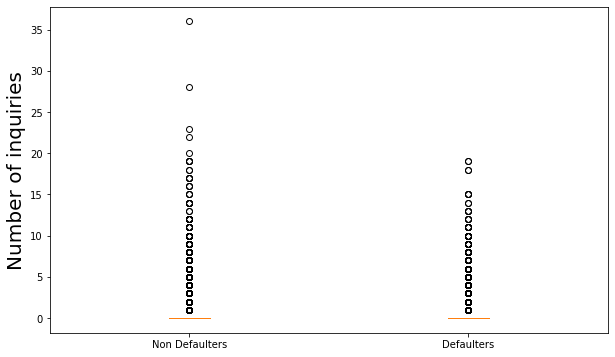

In [141]:
fig48,ax48=plt.subplots(1,1,figsize=(10,6));
ax48.boxplot([loan_df.NO_OF_INQUIRIES[loan_df.loan_default==0],loan_df.NO_OF_INQUIRIES[loan_df.loan_default==1]]);
ax48.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax48.set_ylabel('Number of inquiries',size=20);

In [142]:
max(loan_df.NO_OF_INQUIRIES[loan_df.loan_default==0])

36

In [143]:
max(loan_df.NO_OF_INQUIRIES[loan_df.loan_default==1])

19

#### Most customers do not make any inquiry. Among outliers, few defaulters and non-defaulter make inquires. However, only few non-defaulters in the data analyzed make more than 19 inquires.

### 5. Is credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

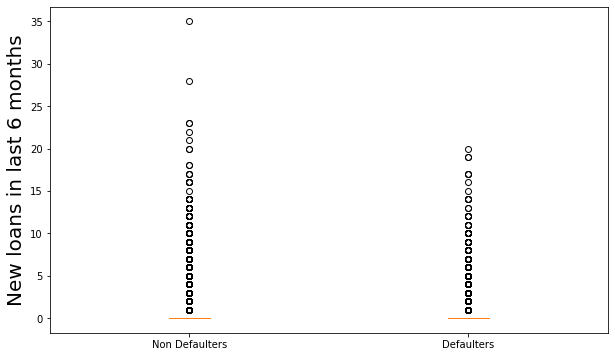

In [144]:
fig49,ax49=plt.subplots(1,1,figsize=(10,6));
ax49.boxplot([loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==0],loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==1]]);
ax49.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax49.set_ylabel('New loans in last 6 months',size=20);

In [145]:
new_loan_non_def=loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==0].value_counts();

In [146]:
new_loan_def=loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==1].value_counts();

In [147]:
new_loan_dist=pd.merge(new_loan_non_def,new_loan_def ,how='outer',left_index=True,right_index=True);  

In [148]:
new_loan_dist.fillna(0,inplace=True);
new_loan_dist.rename(columns={'NEW_ACCTS_IN_LAST_SIX_MONTHS_x':'num_non_defaulters','NEW_ACCTS_IN_LAST_SIX_MONTHS_y':'num_defaulters'},inplace=True)
new_loan_dist.sort_index(inplace=True)

In [149]:
new_loan_dist['defaulter_ratio']=new_loan_dist.num_defaulters/(new_loan_dist.num_non_defaulters+new_loan_dist.num_defaulters);
new_loan_dist.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True)

In [150]:
new_loan_dist

,num_non_defaulters,num_defaulters,defaulter_ratio
19,0.0,2.0,1.000000
17,3.0,3.0,0.500000
15,1.0,1.0,0.500000
14,7.0,4.0,0.363636
20,2.0,1.0,0.333333
12,15.0,5.0,0.250000
0,140812.0,40682.0,0.224151
10,43.0,12.0,0.218182
1,25735.0,6364.0,0.198262
2,8931.0,2084.0,0.189197


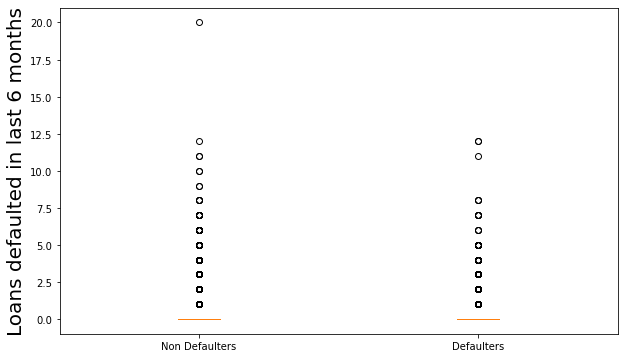

In [151]:
fig50,ax50=plt.subplots(1,1,figsize=(10,6));
ax50.boxplot([loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==0],loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==1]]);
ax50.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax50.set_ylabel('Loans defaulted in last 6 months',size=20);

In [152]:
delinq_non_def=loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==0].value_counts();
delinq_def=loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS[loan_df.loan_default==1].value_counts();
delinq_dist=pd.merge(delinq_non_def,delinq_def ,how='outer',left_index=True,right_index=True); 

In [153]:
delinq_dist.fillna(0,inplace=True);
delinq_dist.rename(columns={'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_x':'num_non_defaulters','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_y':'num_defaulters'},inplace=True)
delinq_dist.sort_index(inplace=True)

In [154]:
delinq_dist['defaulter_ratio']=delinq_dist.num_defaulters/(delinq_dist.num_non_defaulters+delinq_dist.num_defaulters);
delinq_dist.sort_values(by=['defaulter_ratio'],ascending=False,inplace=True)

In [155]:
delinq_dist

,num_non_defaulters,num_defaulters,defaulter_ratio
12,1,2.0,0.666667
8,4,3.0,0.428571
7,8,5.0,0.384615
11,2,1.0,0.333333
4,96,42.0,0.304348
3,385,152.0,0.283054
2,1784,686.0,0.277733
5,42,16.0,0.275862
1,10922,4019.0,0.268991
0,169277,45682.0,0.212515


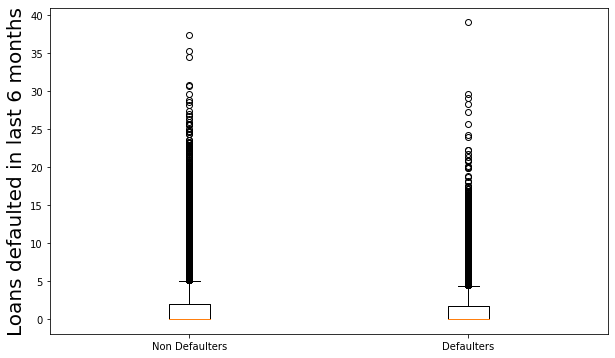

In [156]:
fig51,ax51=plt.subplots(1,1,figsize=(10,6));
ax51.boxplot([loan_df.CREDIT_HISTORY_LENGTH[loan_df.loan_default==0],loan_df.CREDIT_HISTORY_LENGTH[loan_df.loan_default==1]]);
ax51.set_xticklabels(['Non Defaulters','Defaulters'],size=10);
ax51.set_ylabel('Loans defaulted in last 6 months',size=20);


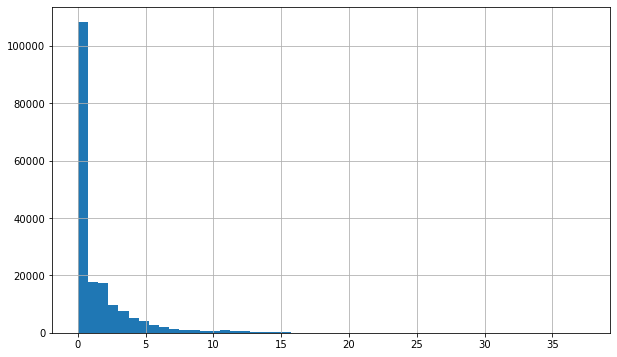

In [157]:
fig52,ax52=plt.subplots(1,1,figsize=(10,6));
loan_df.CREDIT_HISTORY_LENGTH[loan_df.loan_default==0].hist(ax=ax52,bins=50);

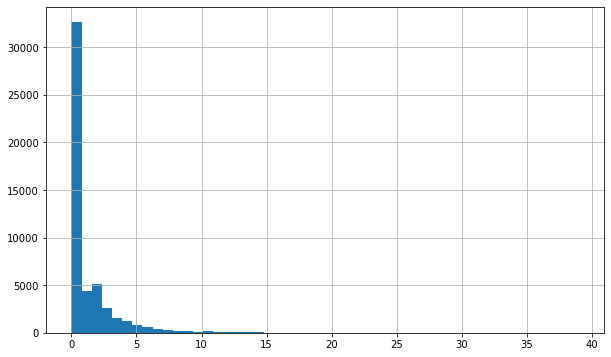

In [158]:
fig53,ax53=plt.subplots(1,1,figsize=(10,6));
loan_df.CREDIT_HISTORY_LENGTH[loan_df.loan_default==1].hist(ax=ax53,bins=50);

In [482]:
loan_df.corr(method='spearman')

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,age
UniqueID,1.000000,0.170198,0.254508,-0.034926,-0.011604,0.029701,-0.020731,0.023511,-0.074115,0.065614,...,-0.054384,-0.014828,-0.043115,-0.004234,-0.008289,-0.016982,-0.019391,0.016886,0.033890,0.004604
disbursed_amount,0.170198,1.000000,0.670569,0.422282,-0.028878,0.065078,0.176631,0.100940,-0.011831,0.005535,...,-0.018416,0.024342,-0.016586,0.031688,0.019590,0.009000,0.015402,0.046513,0.092884,-0.059652
asset_cost,0.254508,0.670569,1.000000,-0.273647,-0.051369,0.152296,0.174760,0.374856,-0.060331,-0.004864,...,-0.034542,-0.063060,-0.032002,-0.039551,-0.015897,-0.056938,-0.058846,-0.040374,0.017208,-0.124432
ltv,-0.034926,0.422282,-0.273647,1.000000,-0.001586,-0.123789,0.099864,-0.291783,0.038164,0.000549,...,0.012572,0.114325,0.013296,0.093593,0.045766,0.082620,0.094579,0.110737,0.099088,0.098122
branch_id,-0.011604,-0.028878,-0.051369,-0.001586,1.000000,0.184861,-0.062171,0.061458,0.251599,0.099850,...,-0.007634,-0.007845,-0.007697,-0.005489,-0.000062,0.002903,0.001184,-0.010169,0.031462,0.004098
supplier_id,0.029701,0.065078,0.152296,-0.123789,0.184861,1.000000,-0.044982,0.167404,0.090393,0.113349,...,-0.027161,-0.074827,-0.025211,-0.063308,-0.026682,-0.072565,-0.082190,-0.053327,0.028757,-0.039670
manufacturer_id,-0.020731,0.176631,0.174760,0.099864,-0.062171,-0.044982,1.000000,-0.052732,0.047746,-0.035696,...,0.011200,0.060300,0.009238,0.055331,0.020030,0.072658,0.080381,0.005318,-0.027774,0.047688
Current_pincode_ID,0.023511,0.100940,0.374856,-0.291783,0.061458,0.167404,-0.052732,1.000000,0.049689,-0.039446,...,-0.061059,-0.117825,-0.053143,-0.114297,-0.053453,-0.131324,-0.139401,-0.100171,0.031026,-0.074980
State_ID,-0.074115,-0.011831,-0.060331,0.038164,0.251599,0.090393,0.047746,0.049689,1.000000,0.117416,...,0.024775,0.018079,0.020912,-0.000871,0.010633,0.001046,0.003586,-0.016524,0.047944,0.040902
Employee_code_ID,0.065614,0.005535,-0.004864,0.000549,0.099850,0.113349,-0.035696,-0.039446,0.117416,1.000000,...,-0.003408,0.000625,0.001505,-0.000001,0.003850,-0.001138,-0.000175,-0.006579,0.020583,0.010830


In [159]:
spearmanr(loan_df.NEW_ACCTS_IN_LAST_SIX_MONTHS,loan_df.loan_default)

SpearmanrResult(correlation=-0.033166575969647984, pvalue=9.393850315048903e-58)

In [160]:
spearmanr(loan_df.DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,loan_df.loan_default)

SpearmanrResult(correlation=0.03805781161461587, pvalue=1.7920328815785558e-75)

In [161]:
spearmanr(loan_df.CREDIT_HISTORY_LENGTH,loan_df.loan_default)

SpearmanrResult(correlation=-0.04042643503420887, pvalue=6.323461808906134e-85)

#### There is not significant correlation of new loans in last six month, loans defaulted in last 6 months and  time since first loan and propability of defaulting`

#### However, this negligible correlation is observed because most customers have zero or very few new loan in 6 months and have zero loan defaults in 6 months. 

#### If we only observe outliers separately, it is noticed that many customers who have new loans in last six months are non-defaulters. Similarly, many defaulters have loans defaulted in last 6 months.

## Observations based on Week 2 Questions 1-5
1. Boxplots show that non-defaulter have higher average bureau score compared to defaulters. 
2. Further, those with bureau rating description indicating high-risk profile of customer showcase more defaulters while those indicating low risk profile showcase fewer defaulters.
3. If we ignore few extreme outliers, non-defaulters tend to have more number of primary accounts with higher balance and are sanctioned and disbursed with greater amount compared to defaulters. 
4. Most customers (both defaulter and non-defaulter) do not have any secondary account. In case of few outliers, non-defaulters tend to have more number of secondary accounts with greater account balance
5. Though there is no difference between sanctioned and disbused amount for primary and secondary accounts of most customers, significant difference is observed for few customers.
6.  Most customers do not make any inquiry. Among outliers, few defaulters and non-defaulter make inquires. However, only few non-defaulters in the data analyzed make more than 19 inquires. None of the defaulters makes more than 19 inquiries.
7. There is not significant correlation of new loans in last six month, loans defaulted in last 6 months and  time since first loan and propability of defaulting`
8. However, this negligible correlation is observed because most customers have zero or very few new loan in 6 months and have zero loan defaults in 6 months. 
9. If we only observe outliers separately, it is noticed that many customers who have new loans in last six months are non-defaulters. Similarly, many defaulters have loans defaulted in last 6 months.


### 6. Perform logistic regression modeling, predict the outcome for the test data, and validate the results using the confusion matrix.

In [162]:
loan_df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,38
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,37
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0.000000,0.000000,1,1,44
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,0,34
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,2.333333,2.333333,0,0,41
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,15209,0,0,0,1.416667,1.416667,1,0,30
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,257948,0,35,5,0.750000,3.833333,1,0,40
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,26046,0,9,1,1.166667,3.166667,0,0,33


In [163]:
loan_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default', 'age'],
      dtype='object')

In [164]:
np.shape(loan_df)

(233154, 42)

In [165]:
# Drop
# UniqueID
# Date_of_Birth
# DisbursalDate
# MobileNo_Avl_Flag
# PERFORM_CNS_SCORE

In [277]:
loan_df_2=loan_df.drop(columns=['UniqueID','Date_of_Birth','DisbursalDate','MobileNo_Avl_Flag','PERFORM_CNS_SCORE','Current_pincode_ID','Employee_code_ID'])

In [278]:
np.shape(loan_df_2)

(233154, 35)

In [279]:
# get_dummies
# branch_id
# manufacturer_id
# Employment_Type
# State_ID
# PERFORM_CNS_SCORE_DESCRIPTION

In [280]:
loan_df_2_dummies=pd.get_dummies(loan_df_2[['branch_id','manufacturer_id','Employment_Type','State_ID','PERFORM_CNS_SCORE_DESCRIPTION']].astype(str),drop_first=True)

In [281]:
np.shape(loan_df_2_dummies)

(233154, 132)

In [282]:
loan_df_2=pd.merge(loan_df_2,loan_df_2_dummies ,how='left',left_index=True,right_index=True); 
loan_df_2=loan_df_2.drop(columns=['branch_id','supplier_id','manufacturer_id','Employment_Type','State_ID','PERFORM_CNS_SCORE_DESCRIPTION']);

In [283]:
np.shape(loan_df_2)

(233154, 161)

In [284]:
spearmanr(loan_df.disbursed_amount,loan_df.asset_cost)

SpearmanrResult(correlation=0.670569337078484, pvalue=0.0)

In [285]:
spearmanr(loan_df.disbursed_amount,loan_df.ltv)

SpearmanrResult(correlation=0.4222823320162862, pvalue=0.0)

#### Since disbursed_amount, asset_cost and ltv are strongly correlated, we drop the asset_cost and ltv column

In [287]:
loan_df_2=loan_df_2.drop(columns=['asset_cost','ltv'])

In [288]:
loan_df_train,loan_df_test=train_test_split(loan_df_2,test_size=0.15,random_state=0);

In [289]:
np.shape(loan_df_train)

(198180, 159)

In [290]:
np.shape(loan_df_test)

(34974, 159)

In [291]:
X_train=loan_df_train.drop(columns=['loan_default']);
y_train=loan_df_train.loan_default;
X_test=loan_df_test.drop(columns=['loan_default']);
y_test=loan_df_test.loan_default;

In [292]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(198180, 158)
(198180,)
(34974, 158)
(34974,)


In [296]:
transformer = Normalizer().fit(X_train[['disbursed_amount','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age']]);

In [297]:
X_train[['disbursed_amount','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age']]=transformer.transform(X_train[['disbursed_amount','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age']])


In [298]:
X_test[['disbursed_amount','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age']]=transformer.transform(X_test[['disbursed_amount','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age']]);

In [469]:
lr_model=LogisticRegression(C=0.1,penalty='elasticnet',solver='saga',l1_ratio=0.75);

In [470]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.75, penalty='elasticnet', solver='saga')

In [471]:
lr_model.score(X_train,y_train)

0.7827934201231204

In [472]:
lr_model.score(X_test,y_test)

0.7829816435066049

In [473]:
lr_model.intercept_

array([-2.93510838])

In [474]:
lr_model.coef_

array([[ 1.44296613, -0.08066312, -0.09834279,  0.06541072, -0.12572076,
        -0.28048665,  0.        ,  0.        ,  0.        ,  0.76135884,
        -0.14380981,  1.18183296,  0.        ,  0.        ,  0.        ,
         0.        ,  0.75009289,  0.48603835,  0.26027867,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.64091899, -0.21558731,  0.        , -0.17003994,
        -0.1810993 ,  0.35274772,  0.27520353,  0.        ,  0.23823379,
         0.0914424 , -0.01469813,  0.        ,  0.        , -0.12353892,
        -0.09011626, -0.0227036 ,  0.13784633,  0.        ,  0.41143013,
         0.18992182, -0.12541186, -0.13916181,  0.33541139,  0.        ,
         0.        ,  0.41301182, -0.10509036, -0.22507407,  0.07506498,
        -0.32292859,  0.03910454, -0.28207297, -0.13156282, -0.07650713,
         0.        ,  0.        ,  0.        ,  0.21102777,  0.        ,
         0.04297638,  0.16733534,  0.15558179,  0.3

In [475]:
lr_model.feature_names_in_

array(['disbursed_amount', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'age', 'branch_id_10',
       'branch_id_100', 'branch_id_101', 'branch_id_103', 'branch_id_104',
       'branch_id_105', 'branch_id_11', 'branch_id_111', 'branch_id_117',
       'branch_id_120', 'branch_id_121', 'branch_id_13', 'branch_id_130',
       'branch_id_135', 'branch_id_136', 'branch_id_138', 'branch_id_14',
       'branch_id_142', 'branch_id_146', 'branch_id_147', 'branch_id_15',
 

In [476]:
lr_model.score(X_train,y_train)

0.7827934201231204

In [477]:
lr_model.score(X_test,y_test)

0.7829816435066049

In [479]:
confusion_matrix(y_test,lr_model.predict(X_test))

array([[27371,     8],
       [ 7582,    13]], dtype=int64)

#### Observations based on Logistic Regression model. Week 2- Question 6
1. The logistic Regression model developed predicts the correct result 78.28 % times 
2. On observing the coefficients of the Logistic regression model, it is found that whether the customer is defaulter majorly depends upon disbursed_amount, PRI_DISBURSED_AMOUNT, Bureau score description etc. among other features like branch id, state id, manufacturing id etc.
3. Customers with higher disbursed_amount tend to have higher chances of being a defaulter.
4. Customers with higher PRI_DISBURSED_AMOUNT tend to have higher chances of being a defaulter.
5. Customers with Very Low risk bureau Score have lower chances of being defaulters while customers Higher risk bureau score have greater chances of defaulting.
6. Based on the confusion matrix, it is observed that the model is able to identify non-defaulters more accurately but is not able to find sufficient number of defaulters. This implies that if the model predicts a defaulter, it can be suggested to not give loan to such candidate. However, if the model does not predict a defaulter, it is difficult to indicate whether the candidate will default or not.